In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics

In [2]:
org_test_data = pd.read_csv("data/Tabular Playground Series - Mar 2021/test.csv")

In [3]:
org_test_data.head(20)

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,...,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10
0,5,A,F,A,A,F,BI,A,AH,AX,...,0.735690,0.578366,0.723154,0.228037,0.356227,0.551249,0.655693,0.598331,0.359987,0.947489
1,6,A,H,C,A,E,AB,I,F,N,...,0.313703,0.928885,0.516602,0.600169,0.795224,0.248987,0.654614,0.347944,0.565520,0.388580
2,8,A,N,C,A,F,AB,A,AH,BC,...,0.448201,0.424876,0.344729,0.242073,0.270632,0.746740,0.335590,0.341238,0.252289,0.411592
3,9,B,L,C,A,F,BI,A,E,AX,...,0.666092,0.598943,0.561971,0.806347,0.735983,0.538724,0.381566,0.481660,0.348514,0.325723
4,11,A,F,A,B,F,BI,A,AH,I,...,0.772229,0.479572,0.767745,0.252454,0.354810,0.178920,0.763479,0.562491,0.466261,0.585781
5,15,A,H,A,E,D,BU,I,AJ,BM,...,0.204415,0.814544,0.514077,0.564421,0.132417,0.340484,0.895413,0.302187,0.701993,0.965526
6,16,A,I,I,A,E,AB,A,AW,AX,...,0.144202,0.257132,0.316538,0.291264,0.789757,0.502821,0.351464,0.364653,0.556265,0.341786
7,17,A,M,Q,B,D,BU,A,AW,Y,...,0.533567,0.172686,0.257455,0.395425,0.140515,0.234976,0.309893,0.313695,0.445009,0.382501
8,21,A,M,A,A,G,BI,A,A,M,...,0.647565,0.642468,0.267340,0.592900,0.737838,0.620653,0.546318,0.379289,0.363683,0.401640
9,24,A,I,A,A,E,BI,C,AK,AS,...,0.344827,0.393931,0.247712,0.579347,0.735125,0.542531,0.232687,0.405377,0.277605,0.311042


In [4]:
org_train_data = pd.read_csv("data/Tabular Playground Series - Mar 2021/train.csv")

In [5]:
org_train_data.head(20)

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,...,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,target
0,0,A,I,A,B,B,BI,A,S,Q,...,0.759439,0.795549,0.681917,0.621672,0.592184,0.791921,0.815254,0.965006,0.665915,0
1,1,A,I,A,A,E,BI,K,W,AD,...,0.386385,0.541366,0.388982,0.357778,0.600044,0.408701,0.399353,0.927406,0.493729,0
2,2,A,K,A,A,E,BI,A,E,BM,...,0.343255,0.616352,0.793687,0.552877,0.352113,0.388835,0.412303,0.292696,0.549452,0
3,3,A,K,A,C,E,BI,A,Y,AD,...,0.831147,0.807807,0.800032,0.619147,0.221789,0.897617,0.633669,0.760318,0.934242,0
4,4,A,I,G,B,E,BI,C,G,Q,...,0.338818,0.277308,0.610578,0.128291,0.578764,0.279167,0.351103,0.357084,0.328960,1
5,7,A,I,C,A,E,BI,C,AV,Y,...,0.524760,0.580085,0.301498,0.261055,0.193988,0.935688,0.685868,0.277694,0.428115,0
6,10,A,A,G,A,H,BI,A,S,AD,...,0.678466,0.747125,0.678212,0.553609,0.281719,0.768782,0.688580,0.320699,0.642256,0
7,12,A,F,A,A,I,BI,C,AF,AG,...,0.943545,0.209744,0.670577,0.772650,0.845751,0.507320,0.927204,0.605755,0.454155,1
8,13,B,I,A,A,E,BI,C,AK,AE,...,0.635195,0.672264,0.561127,0.419873,0.508550,0.673267,0.356103,0.471519,0.499554,0
9,14,A,L,A,B,E,BI,C,AF,AX,...,0.397622,0.506096,0.200673,0.734145,0.521673,0.365571,0.416094,0.584799,0.447149,1


In [6]:
org_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 32 columns):
id        300000 non-null int64
cat0      300000 non-null object
cat1      300000 non-null object
cat2      300000 non-null object
cat3      300000 non-null object
cat4      300000 non-null object
cat5      300000 non-null object
cat6      300000 non-null object
cat7      300000 non-null object
cat8      300000 non-null object
cat9      300000 non-null object
cat10     300000 non-null object
cat11     300000 non-null object
cat12     300000 non-null object
cat13     300000 non-null object
cat14     300000 non-null object
cat15     300000 non-null object
cat16     300000 non-null object
cat17     300000 non-null object
cat18     300000 non-null object
cont0     300000 non-null float64
cont1     300000 non-null float64
cont2     300000 non-null float64
cont3     300000 non-null float64
cont4     300000 non-null float64
cont5     300000 non-null float64
cont6     300000 non-null 

In [7]:
#Check for null
org_train_data.isnull().sum()

id        0
cat0      0
cat1      0
cat2      0
cat3      0
cat4      0
cat5      0
cat6      0
cat7      0
cat8      0
cat9      0
cat10     0
cat11     0
cat12     0
cat13     0
cat14     0
cat15     0
cat16     0
cat17     0
cat18     0
cont0     0
cont1     0
cont2     0
cont3     0
cont4     0
cont5     0
cont6     0
cont7     0
cont8     0
cont9     0
cont10    0
target    0
dtype: int64

In [8]:
# Get all columns with float values. Exclude Strings to plot histogram.
feature_list_num = ['cont0', 'cont1', 'cont2', 'cont3', 'cont4', 'cont5',
                'cont6', 'cont7', 'cont8', 'cont9', 'cont10']
feature_list_num

['cont0',
 'cont1',
 'cont2',
 'cont3',
 'cont4',
 'cont5',
 'cont6',
 'cont7',
 'cont8',
 'cont9',
 'cont10']

In [9]:
feature_list_cat = ['cat0', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8', 'cat9', 
                    'cat10', 'cat11', 'cat12', 'cat13', 'cat14', 'cat15', 'cat16', 'cat17', 'cat18']
feature_list_cat

['cat0',
 'cat1',
 'cat2',
 'cat3',
 'cat4',
 'cat5',
 'cat6',
 'cat7',
 'cat8',
 'cat9',
 'cat10',
 'cat11',
 'cat12',
 'cat13',
 'cat14',
 'cat15',
 'cat16',
 'cat17',
 'cat18']

Text(0.5, 0.98, 'Histograms of Numerical Features')

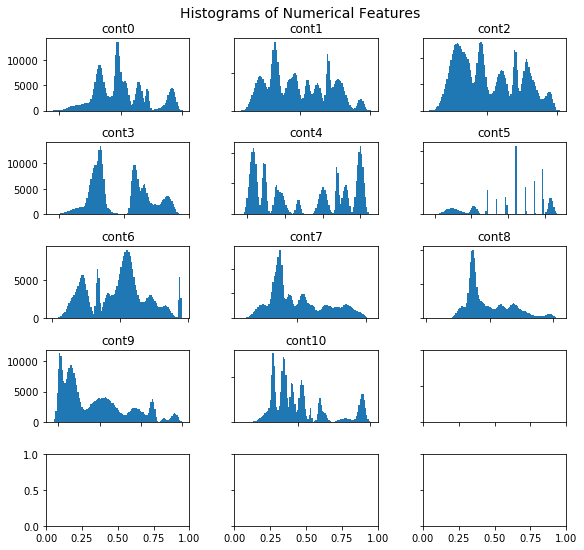

In [10]:
# Histogram for each numeric feature

fig, axs = plt.subplots(5, 3)
fig.set_size_inches(8, 8) 
fig.tight_layout(rect=[0, 0.03, 1, 0.95]) 

axs[0, 0].hist(org_train_data[feature_list_num[0]], bins=100) #First histogram at 0x0 
axs[0, 0].set_title(feature_list_num[0]) 

axs[0, 1].hist(org_train_data[feature_list_num[1]], bins=100) #Second histogram at 0x1 
axs[0, 1].set_title(feature_list_num[1])

axs[0, 2].hist(org_train_data[feature_list_num[2]], bins=100)
axs[0, 2].set_title(feature_list_num[2])
                    
axs[1, 0].hist(org_train_data[feature_list_num[3]], bins=100)
axs[1, 0].set_title(feature_list_num[3])
                    
axs[1, 1].hist(org_train_data[feature_list_num[4]], bins=100)
axs[1, 1].set_title(feature_list_num[4])

axs[1, 2].hist(org_train_data[feature_list_num[5]], bins=100)
axs[1, 2].set_title(feature_list_num[5])
                    
axs[2, 0].hist(org_train_data[feature_list_num[6]], bins=100)
axs[2, 0].set_title(feature_list_num[6])

axs[2, 1].hist(org_train_data[feature_list_num[7]], bins=100)
axs[2, 1].set_title(feature_list_num[7])

axs[2, 2].hist(org_train_data[feature_list_num[8]], bins=100)
axs[2, 2].set_title(feature_list_num[8])

axs[3, 0].hist(org_train_data[feature_list_num[9]], bins=100)
axs[3, 0].set_title(feature_list_num[9])                    
                    
axs[3, 1].hist(org_train_data[feature_list_num[10]], bins=100)
axs[3, 1].set_title(feature_list_num[10])                                        
                                        
# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
                    
plt.suptitle("Histograms of Numerical Features", size=14)                    

In [11]:
import seaborn as sns

[Text(81.0, 0.5, '')]

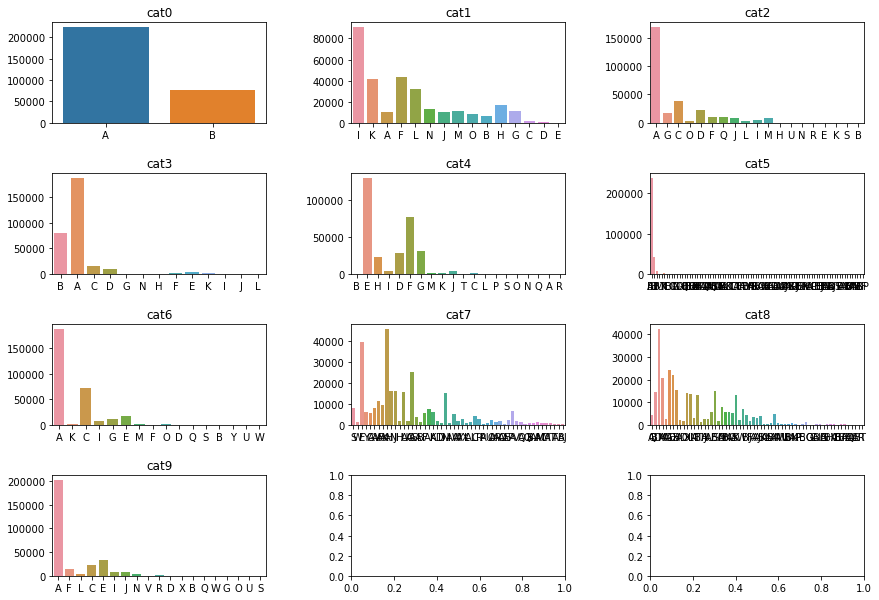

In [12]:
fig, axs = plt.subplots(4, 3)
fig.set_size_inches(12, 9)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.subplots_adjust(wspace=0.4, hspace=0.5)

sns.countplot(data=org_train_data, x=feature_list_cat[0], ax=axs[0, 0])
axs[0, 0].title.set_text(feature_list_cat[0])
axs[0, 0].set(xlabel=None)
axs[0, 0].set(ylabel=None)

sns.countplot(data=org_train_data, x=feature_list_cat[1], ax=axs[0, 1])
axs[0, 1].title.set_text(feature_list_cat[1])
axs[0, 1].set(xlabel=None)
axs[0, 1].set(ylabel=None)

sns.countplot(data=org_train_data, x=feature_list_cat[2], ax=axs[0, 2])
axs[0, 2].title.set_text(feature_list_cat[2])
axs[0, 2].set(xlabel=None)
axs[0, 2].set(ylabel=None)

sns.countplot(data=org_train_data, x=feature_list_cat[3], ax=axs[1, 0])
axs[1, 0].title.set_text(feature_list_cat[3])
axs[1, 0].set(xlabel=None)
axs[1, 0].set(ylabel=None)

sns.countplot(data=org_train_data, x=feature_list_cat[4], ax=axs[1, 1])
axs[1, 1].title.set_text(feature_list_cat[4])
axs[1, 1].set(xlabel=None)
axs[1, 1].set(ylabel=None)

sns.countplot(data=org_train_data, x=feature_list_cat[5], ax=axs[1, 2])
axs[1, 2].title.set_text(feature_list_cat[5])
axs[1, 2].set(xlabel=None)
axs[1, 2].set(ylabel=None)

sns.countplot(data=org_train_data, x=feature_list_cat[6], ax=axs[2, 0])
axs[2, 0].title.set_text(feature_list_cat[6])
axs[2, 0].set(xlabel=None)
axs[2, 0].set(ylabel=None)

sns.countplot(data=org_train_data, x=feature_list_cat[7], ax=axs[2, 1])
axs[2, 1].title.set_text(feature_list_cat[7])
axs[2, 1].set(xlabel=None)
axs[2, 1].set(ylabel=None)

sns.countplot(data=org_train_data, x=feature_list_cat[8], ax=axs[2, 2])
axs[2, 2].title.set_text(feature_list_cat[8])
axs[2, 2].set(xlabel=None)
axs[2, 2].set(ylabel=None)

sns.countplot(data=org_train_data, x=feature_list_cat[9], ax=axs[3, 0])
axs[3, 0].title.set_text(feature_list_cat[9])
axs[3, 0].set(xlabel=None)
axs[3, 0].set(ylabel=None)

In [13]:
features = org_train_data.drop("target", axis=1)
features = features.drop("id", axis=1)
features.head(5)

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10
0,A,I,A,B,B,BI,A,S,Q,A,...,0.855349,0.759439,0.795549,0.681917,0.621672,0.592184,0.791921,0.815254,0.965006,0.665915
1,A,I,A,A,E,BI,K,W,AD,F,...,0.328929,0.386385,0.541366,0.388982,0.357778,0.600044,0.408701,0.399353,0.927406,0.493729
2,A,K,A,A,E,BI,A,E,BM,L,...,0.322749,0.343255,0.616352,0.793687,0.552877,0.352113,0.388835,0.412303,0.292696,0.549452
3,A,K,A,C,E,BI,A,Y,AD,F,...,0.707663,0.831147,0.807807,0.800032,0.619147,0.221789,0.897617,0.633669,0.760318,0.934242
4,A,I,G,B,E,BI,C,G,Q,A,...,0.274514,0.338818,0.277308,0.610578,0.128291,0.578764,0.279167,0.351103,0.357084,0.328960


In [14]:
target = org_train_data[["target"]]
target.head(5)

,target
0,0
1,0
2,0
3,0
4,1


In [15]:
type(features), type(target)

(pandas.core.frame.DataFrame, pandas.core.frame.DataFrame)

In [16]:
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
scalar = StandardScaler()
encoder = OrdinalEncoder()

features[feature_list_num] = scalar.fit_transform(features[feature_list_num])
features[feature_list_cat] = encoder.fit_transform(features[feature_list_cat])

features.head(5)

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10
0,0.0,8.0,0.0,1.0,1.0,33.0,0.0,44.0,54.0,0.0,...,1.695842,1.130121,1.483204,0.778418,0.494997,0.491902,1.425987,1.827327,2.547402,0.775276
1,0.0,8.0,0.0,0.0,4.0,33.0,8.0,48.0,3.0,5.0,...,-0.775191,-0.606220,0.309882,-0.509358,-0.598895,0.529090,-0.457197,-0.495519,2.354099,-0.071293
2,0.0,10.0,0.0,0.0,4.0,33.0,0.0,30.0,38.0,9.0,...,-0.804203,-0.806964,0.656018,1.269770,0.209828,-0.644076,-0.554821,-0.423189,-0.908927,0.202676
3,0.0,10.0,0.0,2.0,4.0,33.0,0.0,50.0,3.0,5.0,...,1.002598,1.463881,1.539786,1.297666,0.484532,-1.260751,1.945391,0.813161,1.495107,2.094532
4,0.0,8.0,6.0,1.0,4.0,33.0,2.0,32.0,54.0,0.0,...,-1.030621,-0.827615,-0.909025,0.464803,-1.550166,0.428400,-1.093741,-0.764999,-0.577910,-0.881397


In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [19]:
x_train.size, x_test.size, y_train.size, y_test.size

(7200000, 1800000, 240000, 60000)

### Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression(solver= 'lbfgs', max_iter = 500)

logistic_regression.fit(x_train, y_train)

/Users/gajendrasahu/opt/anaconda3/envs/datasciencebasics/lib/python3.5/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/gajendrasahu/opt/anaconda3/envs/datasciencebasics/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=500, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [21]:
lr_y_train_pred = logistic_regression.predict(x_train)

In [22]:
from sklearn.metrics import explained_variance_score, r2_score, mean_absolute_error, mean_squared_error

print("explained_variance_score: ", str(round(explained_variance_score(y_train, lr_y_train_pred), 4)))
print("r2_score: ", str(round(r2_score(y_train, lr_y_train_pred), 4)))
print("mean_absolute_error: ", str(round(mean_absolute_error(y_train, lr_y_train_pred), 4)))
print("mean_squared_error: ", str(round(mean_squared_error(y_train, lr_y_train_pred), 4)))

explained_variance_score:  0.178
r2_score:  0.1632
mean_absolute_error:  0.1632
mean_squared_error:  0.1632


In [23]:
lr_y_test_pred = logistic_regression.predict(x_test)

In [24]:
logistic_regression.score(x_test, y_test)

0.8386166666666667

### SGD (Stochastic Gradient Descent)

In [25]:
from sklearn.linear_model import SGDClassifier

In [26]:
sgd_classifier = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)

In [27]:
sgd_classifier.fit(x_train, y_train)

/Users/gajendrasahu/opt/anaconda3/envs/datasciencebasics/lib/python3.5/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [28]:
sgd_y_train_pred = sgd_classifier.predict(x_train)

In [29]:
from sklearn.metrics import explained_variance_score, r2_score, mean_absolute_error, mean_squared_error

print("explained_variance_score: ", str(round(explained_variance_score(y_train, sgd_y_train_pred), 4)))
print("r2_score: ", str(round(r2_score(y_train, sgd_y_train_pred), 4)))
print("mean_absolute_error: ", str(round(mean_absolute_error(y_train, sgd_y_train_pred), 4)))
print("mean_squared_error: ", str(round(mean_squared_error(y_train, sgd_y_train_pred), 4)))

explained_variance_score:  0.019
r2_score:  -0.3016
mean_absolute_error:  0.2539
mean_squared_error:  0.2539


In [30]:
sgd_y_test_pred = sgd_classifier.predict(x_test)

In [31]:
sgd_classifier.score(x_test, y_test)

0.74935

### Decision Tree

In [32]:
from sklearn.tree import DecisionTreeClassifier

In [33]:
dt_classifier = DecisionTreeClassifier(criterion='gini', random_state=1)

In [34]:
dt_classifier.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

In [35]:
dt_y_train_pred = dt_classifier.predict(x_train)

In [36]:
from sklearn.metrics import explained_variance_score, r2_score, mean_absolute_error, mean_squared_error

print("explained_variance_score: ", str(round(explained_variance_score(y_train, dt_y_train_pred), 4)))
print("r2_score: ", str(round(r2_score(y_train, dt_y_train_pred), 4)))
print("mean_absolute_error: ", str(round(mean_absolute_error(y_train, dt_y_train_pred), 4)))
print("mean_squared_error: ", str(round(mean_squared_error(y_train, dt_y_train_pred), 4)))

explained_variance_score:  1.0
r2_score:  1.0
mean_absolute_error:  0.0
mean_squared_error:  0.0


In [37]:
dt_y_test_pred = dt_classifier.predict(x_test)

In [38]:
dt_y_test_pred

array([0, 0, 0, ..., 0, 1, 0])

In [39]:
dt_classifier.score(x_test, y_test)

0.77325

In [40]:
print('Accuracy: ', metrics.accuracy_score(y_test, dt_y_test_pred))

Accuracy:  0.77325


### Random Forest

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [42]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state = 42)

In [43]:
rf_classifier.fit(x_train, y_train.values.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [44]:
rf_y_train_pred = rf_classifier.predict(x_train)

In [45]:
from sklearn.metrics import explained_variance_score, r2_score, mean_absolute_error, mean_squared_error

print("explained_variance_score: ", str(round(explained_variance_score(y_train, rf_y_train_pred), 4)))
print("r2_score: ", str(round(r2_score(y_train, rf_y_train_pred), 4)))
print("mean_absolute_error: ", str(round(mean_absolute_error(y_train, rf_y_train_pred), 4)))
print("mean_squared_error: ", str(round(mean_squared_error(y_train, rf_y_train_pred), 4)))

explained_variance_score:  0.9999
r2_score:  0.9999
mean_absolute_error:  0.0
mean_squared_error:  0.0


In [46]:
rf_y_test_pred = rf_classifier.predict(x_test)

In [47]:
rf_classifier.score(x_test, y_test)

0.8475166666666667

In [48]:
print('Accuracy: ', metrics.accuracy_score(y_test, rf_y_test_pred))

Accuracy:  0.8475166666666667


### ANN (Artificial Neural Networks)

In [49]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential # Importing sequential model
from tensorflow.keras.layers import Flatten, Dense # Importing layers

In [59]:
model = Sequential()

# Input Layer. Input all data or all columns in original data. 
# X.shape[1] will give us the count of column in 1st row.
model.add(Dense(x_train.shape[1], activation="relu", input_dim = x_train.shape[1])) #X.shape[1] = 11

# Hidden layer. Repeat the test for 128 times.
model.add(Dense(32, activation="relu")) # 128 No of layers. (11 + 1) x 128 = 1536

model.add(Dense(64, activation="relu"))

model.add(Dense(128, activation="relu"))

# Output Layer. Ouput no of layers is expected different outcome -1. Here it is, exited or not exited, 2 - 1 = 1
model.add(Dense(1, activation="sigmoid")) # (128 + 1) x 1 = 129

# Total
# 1536 + 129 = 1797



In [60]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_7 (Dense)              (None, 32)                992       
_________________________________________________________________
dense_8 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_9 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 129       
Total params: 12,483
Trainable params: 12,483
Non-trainable params: 0
_________________________________________________________________


In [61]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [62]:
model.fit(x_train, y_train, batch_size=10, epochs=10, verbose=1)

Epoch 1/10
240000/240000 [==============================] - 176s 732us/step - loss: 0.3951 - acc: 0.8300
Epoch 2/10
240000/240000 [==============================] - 179s 747us/step - loss: 0.3821 - acc: 0.8365
Epoch 3/10
240000/240000 [==============================] - 175s 728us/step - loss: 0.3799 - acc: 0.8368s - l
Epoch 4/10
240000/240000 [==============================] - 774s 3ms/step - loss: 0.3785 - acc: 0.8371
Epoch 5/10
240000/240000 [==============================] - 178s 742us/step - loss: 0.3775 - acc: 0.8378
Epoch 6/10
240000/240000 [==============================] - 175s 728us/step - loss: 0.3766 - acc: 0.8379
Epoch 7/10
240000/240000 [==============================] - 168s 700us/step - loss: 0.3764 - acc: 0.8381
Epoch 8/10
240000/240000 [==============================] - 805s 3ms/step - loss: 0.3756 - acc: 0.8384
Epoch 9/10
240000/240000 [==============================] - 178s 740us/step - loss: 0.3751 - acc: 0.8386
Epoch 10/10
240000/240000 [===========================

In [76]:
x_output = pd.read_csv("data/Tabular Playground Series - Mar 2021/test.csv")
x_submit = pd.read_csv("data/Tabular Playground Series - Mar 2021/test.csv")
output_id = x_output["id"] 
x_output = x_output.drop("id", axis=1)

In [77]:
x_output.head(5)

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10
0,A,F,A,A,F,BI,A,AH,AX,A,...,0.735690,0.578366,0.723154,0.228037,0.356227,0.551249,0.655693,0.598331,0.359987,0.947489
1,A,H,C,A,E,AB,I,F,N,A,...,0.313703,0.928885,0.516602,0.600169,0.795224,0.248987,0.654614,0.347944,0.565520,0.388580
2,A,N,C,A,F,AB,A,AH,BC,A,...,0.448201,0.424876,0.344729,0.242073,0.270632,0.746740,0.335590,0.341238,0.252289,0.411592
3,B,L,C,A,F,BI,A,E,AX,A,...,0.666092,0.598943,0.561971,0.806347,0.735983,0.538724,0.381566,0.481660,0.348514,0.325723
4,A,F,A,B,F,BI,A,AH,I,A,...,0.772229,0.479572,0.767745,0.252454,0.354810,0.178920,0.763479,0.562491,0.466261,0.585781


In [78]:
x_output[feature_list_num] = scalar.fit_transform(x_output[feature_list_num])
x_output[feature_list_cat] = encoder.fit_transform(x_output[feature_list_cat])
x_output.head(5)

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10
0,0.0,5.0,0.0,0.0,5.0,33.0,0.0,8.0,23.0,0.0,...,1.136511,0.288432,1.142678,-1.218033,-0.600533,0.302525,0.750807,0.614883,-0.563211,2.150369
1,0.0,7.0,2.0,0.0,4.0,2.0,7.0,31.0,51.0,0.0,...,-0.847490,1.920637,0.190470,0.419887,1.218205,-1.127727,0.745514,-0.784750,0.490811,-0.590385
2,0.0,13.0,2.0,0.0,5.0,2.0,0.0,8.0,28.0,0.0,...,-0.215139,-0.426300,-0.601872,-1.156254,-0.955149,1.227555,-0.819921,-0.822234,-1.115516,-0.477538
3,1.0,11.0,2.0,0.0,5.0,33.0,0.0,30.0,23.0,0.0,...,0.809291,0.384247,0.399620,1.327367,0.972776,0.243260,-0.594318,-0.037294,-0.622050,-0.898621
4,0.0,5.0,0.0,1.0,5.0,33.0,0.0,8.0,46.0,0.0,...,1.308300,-0.171607,1.348246,-1.110562,-0.606405,-1.459273,1.279705,0.414544,-0.018214,0.376638


In [79]:
import datetime as datetime

now = datetime.datetime.now()

y_output = rf_classifier.predict(x_output)
x_output["id"] = output_id
x_output["target"] = y_output

date_time = "date_" + str(now.year) + "-" + str(now.month) + "-" + str(now.day) + "_time_" + str(now.hour) + "-" + str(now.minute)

x_output.to_csv("data/Tabular Playground Series - Mar 2021/my_submit.csv", index=False)

In [80]:
x_output.head(5)

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,id,target
0,0.0,5.0,0.0,0.0,5.0,33.0,0.0,8.0,23.0,0.0,...,1.142678,-1.218033,-0.600533,0.302525,0.750807,0.614883,-0.563211,2.150369,5,0
1,0.0,7.0,2.0,0.0,4.0,2.0,7.0,31.0,51.0,0.0,...,0.190470,0.419887,1.218205,-1.127727,0.745514,-0.784750,0.490811,-0.590385,6,1
2,0.0,13.0,2.0,0.0,5.0,2.0,0.0,8.0,28.0,0.0,...,-0.601872,-1.156254,-0.955149,1.227555,-0.819921,-0.822234,-1.115516,-0.477538,8,0
3,1.0,11.0,2.0,0.0,5.0,33.0,0.0,30.0,23.0,0.0,...,0.399620,1.327367,0.972776,0.243260,-0.594318,-0.037294,-0.622050,-0.898621,9,0
4,0.0,5.0,0.0,1.0,5.0,33.0,0.0,8.0,46.0,0.0,...,1.348246,-1.110562,-0.606405,-1.459273,1.279705,0.414544,-0.018214,0.376638,11,0


In [81]:
submit = pd.read_csv("data/Tabular Playground Series - Mar 2021/sample_submission.csv")
submit.head(5)

,id,target
0,5,0
1,6,1
2,8,0
3,9,0
4,11,0
